In [ ]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
import re
import nltk
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('universal_tagset')
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import wordnet
from nltk.tag import pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from google.colab import files
from sklearn.cluster import KMeans

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# file = files.upload()
# df = pd.read_csv(file)
df = pd.read_csv('/content/sample_data/Eluvio_DS_Challenge.csv')
print(df.shape)
df.head()

(509236, 8)


,time_created,date_created,up_votes,down_votes,title,over_18,author,category
0,1201232046,1/25/08,3,0,Scores killed in Pakistan clashes,False,polar,worldnews
1,1201232075,1/25/08,2,0,Japan resumes refuelling mission,False,polar,worldnews
2,1201232523,1/25/08,3,0,US presses Egypt on Gaza border,False,polar,worldnews
3,1201233290,1/25/08,1,0,Jump-start economy: Give health care to all,False,fadi420,worldnews
4,1201274720,1/25/08,4,0,Council of Europe bashes EU&UN terror blacklist,False,mhermans,worldnews


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509236 entries, 0 to 509235
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   time_created  509236 non-null  int64 
 1   date_created  509236 non-null  object
 2   up_votes      509236 non-null  int64 
 3   down_votes    509236 non-null  int64 
 4   title         509236 non-null  object
 5   over_18       509236 non-null  bool  
 6   author        509236 non-null  object
 7   category      509236 non-null  object
dtypes: bool(1), int64(3), object(4)
memory usage: 27.7+ MB


In [ ]:
# convert all the words to lower case
df['cleaned'] = df['title'].str.lower()

# remove the punctuation and digits
df['cleaned'] = df['cleaned'].str.replace('[0-9]', '')
df['cleaned'] = df['cleaned'].str.replace('[^\w\s]', '')
df.head()

,time_created,date_created,up_votes,down_votes,title,over_18,author,category,cleaned
0,1201232046,1/25/08,3,0,Scores killed in Pakistan clashes,False,polar,worldnews,scores killed in pakistan clashes
1,1201232075,1/25/08,2,0,Japan resumes refuelling mission,False,polar,worldnews,japan resumes refuelling mission
2,1201232523,1/25/08,3,0,US presses Egypt on Gaza border,False,polar,worldnews,us presses egypt on gaza border
3,1201233290,1/25/08,1,0,Jump-start economy: Give health care to all,False,fadi420,worldnews,jumpstart economy give health care to all
4,1201274720,1/25/08,4,0,Council of Europe bashes EU&UN terror blacklist,False,mhermans,worldnews,council of europe bashes euun terror blacklist


In [ ]:
# remove stop words and do lemmatization
stop_words = stopwords.words("english")
lemmatizer = WordNetLemmatizer()

# get word net tags
def get_pos_tag(nltk_tag):  
  if nltk_tag.startswith('J'):
    return wordnet.ADJ
  elif nltk_tag.startswith('V'):
    return wordnet.VERB
  elif nltk_tag.startswith('N'):
    return wordnet.NOUN
  elif nltk_tag.startswith('R'):
    return wordnet.ADV
  else:          
    return None

def lemmatize_text(sentence):
  text = [word for word in sentence.split() if word not in stop_words]
  word_tags = nltk.pos_tag(text)  
  lemmatized = []
  for word, nltk_tag in word_tags:
    tag = get_pos_tag(nltk_tag)
    if tag is None:
      lemmatized.append(word)
    else:        
      lemmatized.append(lemmatizer.lemmatize(word, tag))
  return " ".join(lemmatized)
df['cleaned'] = df['cleaned'].apply(lambda x: lemmatize_text(x))
df['cleaned'] = df['cleaned'].fillna("")
df.head()

,time_created,date_created,up_votes,down_votes,title,over_18,author,category,cleaned
0,1201232046,1/25/08,3,0,Scores killed in Pakistan clashes,False,polar,worldnews,score kill pakistan clash
1,1201232075,1/25/08,2,0,Japan resumes refuelling mission,False,polar,worldnews,japan resume refuel mission
2,1201232523,1/25/08,3,0,US presses Egypt on Gaza border,False,polar,worldnews,us press egypt gaza border
3,1201233290,1/25/08,1,0,Jump-start economy: Give health care to all,False,fadi420,worldnews,jumpstart economy give health care
4,1201274720,1/25/08,4,0,Council of Europe bashes EU&UN terror blacklist,False,mhermans,worldnews,council europe bash euun terror blacklist


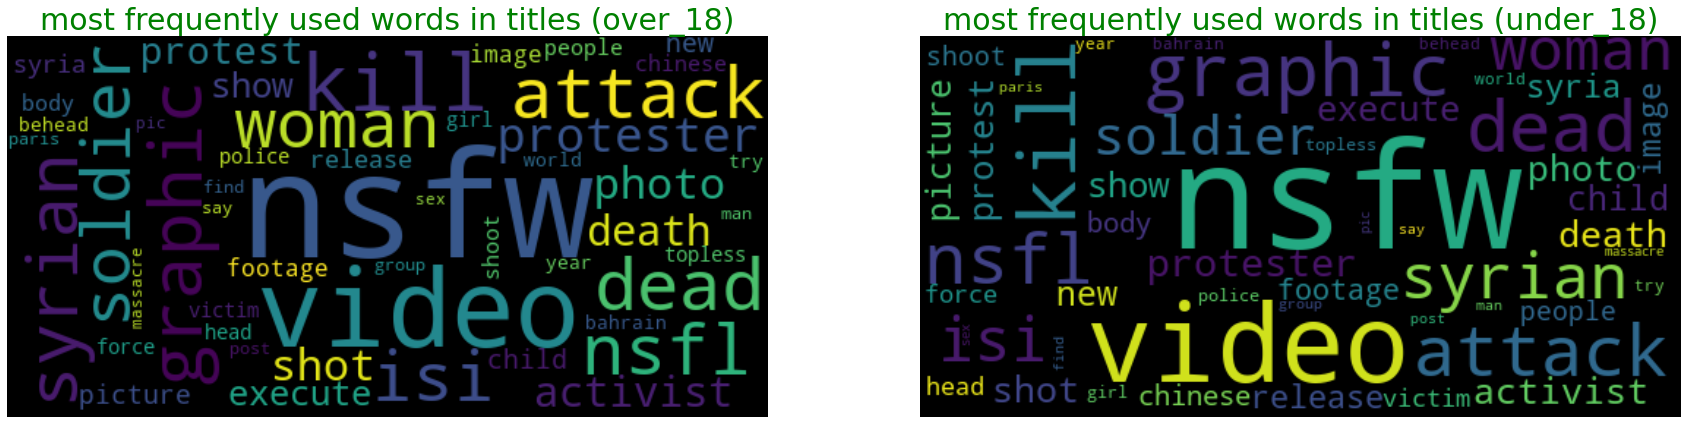

In [ ]:
text_over_18 = " ".join(df.loc[df['over_18'] == True, 'cleaned'].to_numpy())
text_under_18 = " ".join(df.loc[df['over_18'] == False, 'cleaned'].to_numpy())

# Create the wordcloud object
wordcloud_over = WordCloud(width=520, height=260, max_font_size=100, max_words=50).generate(text_over_18)
wordcloud_under = WordCloud(width=520, height=260, max_font_size=100, max_words=50).generate(text_over_18)

#plot word clouds
fig=plt.figure(figsize=(30,20))
ax1 = fig.add_subplot(2,2,1)
ax1.set_title('most frequently used words in titles (over_18)', fontsize=30, color="green")
ax1.imshow(wordcloud_over, interpolation='bilinear')
ax1.axis('off') 

ax2 = fig.add_subplot(2,2,2)
ax2.set_title('most frequently used words in titles (under_18)', fontsize=30, color="green")
ax2.imshow(wordcloud_under, interpolation='bilinear')
ax2.axis('off') 

plt.show()

In [ ]:
# download the data
files.download("data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>